# Caso de Estudio: Análisis y Predicción de Datos de Empleados

Desarrollar el análisis y modelado sobre un dataset de empleados de una empresa. Este dataset incluye información sobre la educación, año de incorporación, ciudad de trabajo, categoría salarial, edad, género, si han sido asignados temporalmente a la banca (EverBenched), experiencia en el dominio actual y si el empleado tomó tiempo libre (LeaveOrNot). El dataset ha sido modificado para incluir datos faltantes, añadiendo realismo al desafío analítico.

# Preprocesamiento de Datos:

## Cargar el dataset

Se cargan los datos del archivo csv EmployeesData.csv


In [ ]:
import pandas as pd

df = pd.read_csv('EmployeesData.csv')


## Se verifica si existen datos faltantes

Se agrega el .sum() para que sume el número de valores faltantes por columna, ya que al mostrar solamente los nulos la tabla es resumida en este jupiter notebook. De esta manera podemos cuantificar esto mejor.

In [7]:
print(df.isnull().sum())


Education                     0
JoiningYear                   0
City                          0
PaymentTier                  41
Age                          27
Gender                        0
EverBenched                   0
ExperienceInCurrentDomain     0
LeaveOrNot                    0
dtype: int64


## Convertir la columna 'LeaveOrNot' de valores binarios a etiquetas categóricas:

In [4]:
df['LeaveOrNot'] = df['LeaveOrNot'].map({0: 'Not Leave', 1: 'Leave'})

## Eliminar filas con valores faltantes en 'ExperienceInCurrentDomain' y 'JoiningYear':

In [5]:
df = df.dropna(subset=['ExperienceInCurrentDomain', 'JoiningYear'])


## Imputar datos faltantes de la colúmna Age con la media.

Para llenar los datos se utiliza la función fillna y .mean() que es la función de agregación destinada para la media

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

## Imputar datos faltantes en 'PaymentTier' con la moda:

Para llenar los datos se utiliza la función fillna y .mode() que es la función de agregación destinada para la moda

In [8]:
df['PaymentTier'] = df['PaymentTier'].fillna(df['PaymentTier'].mode()[0])


## Eliminar registros con valores atípicos usando el análisis de IQR:

In [11]:
# Se seleccionan únicamente las columnas numéricas, ya que encontré errores al usar todo el dataset
num_columns = df.select_dtypes(include=['number']).columns

#Se calcula el IQR para las columnas numéricas: 
Q1 = df[num_columns].quantile(0.25)
Q3 = df[num_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtrar filas para eliminar valores atípicos
df = df[~((df[num_columns] < (Q1 - 1.5 * IQR)) | (df[num_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]



# Análisis Exploratorio de Datos EDA

## Graficar la distribución de los sexos con un gráfico de torta

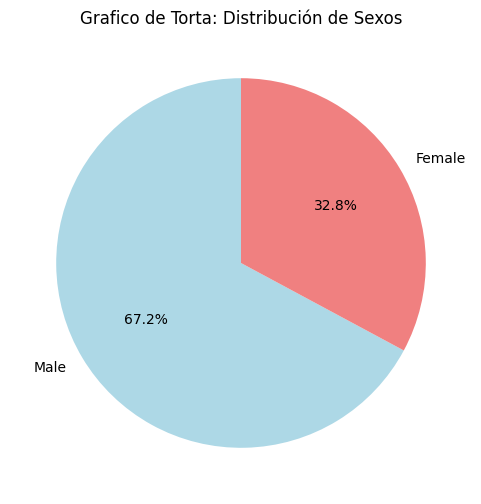

In [17]:
import matplotlib.pyplot as plt

# Contar los valores de sexo
sex_counts = df['Gender'].value_counts()

colors = ['lightblue', 'lightcoral']
# Graficar el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors = colors, startangle=90)
plt.title('Grafico de Torta: Distribución de Sexos')
plt.show()


## Graficar la Distribución de niveles de estudio de los empleados usando subplots para tener un histograma a la izquierda y a su derecha una gráfica de torta.

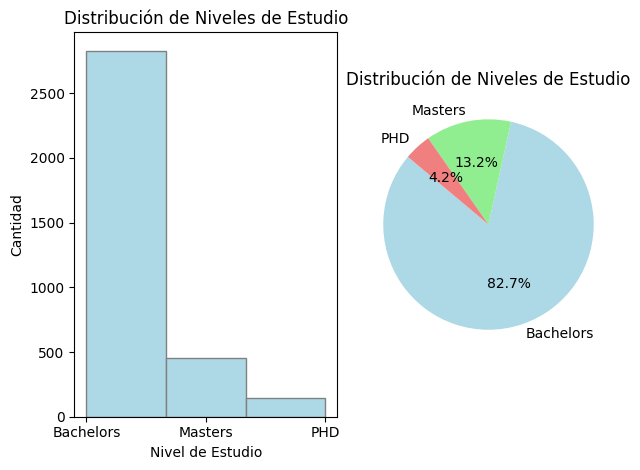

In [43]:
import matplotlib.pyplot as plt
import numpy as np

#Se utiliza subplot para realizar el primer grafico: Histógrama
#Indice 1 que proque es el primero de izquierda a derecha
plt.subplot(1, 2, 1)
plt.hist(df['Education'], bins=3, color= 'lightblue', edgecolor='gray')
plt.title('Distribución de Niveles de Estudio')
plt.xlabel('Nivel de Estudio')
plt.ylabel('Cantidad')

#Se utiliza subplot para realizar el primer grafico: gráfico de tortas
#Indice 1 que proque es el primero de izquierda a derecha
plt.subplot(1, 2, 2)
#Se sacan los valores de la columna education
education_counts = df['Education'].value_counts()
colors =['lightblue','lightgreen','lightcoral']
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribución de Niveles de Estudio')

plt.tight_layout()
plt.show()


## Responder esta pregunta usando un histograma: ¿Son los jóvenes más propensos a tomar licencias?.

Para responder esta pregunta, primero es importante definir a qué rango de edad se definen como jóvenes.

- Jovenes: menores de 30 años

La variable objetivo del histograma corresponde a la columna 'LeaveorNot' donde sabemos si un empleado tomó o no una licencia

Para poder realizar la comparación se realizarán 2 histogramas que compararán leave y not leave

### Conclusiones

Como podemos ver en la gráfica de abajo, si se percibe un incremento considerable en la frecuencia de ausencias para las personas menores de 30 años. Por este motivo los jóvenes son más propensos a tomar licencias. 

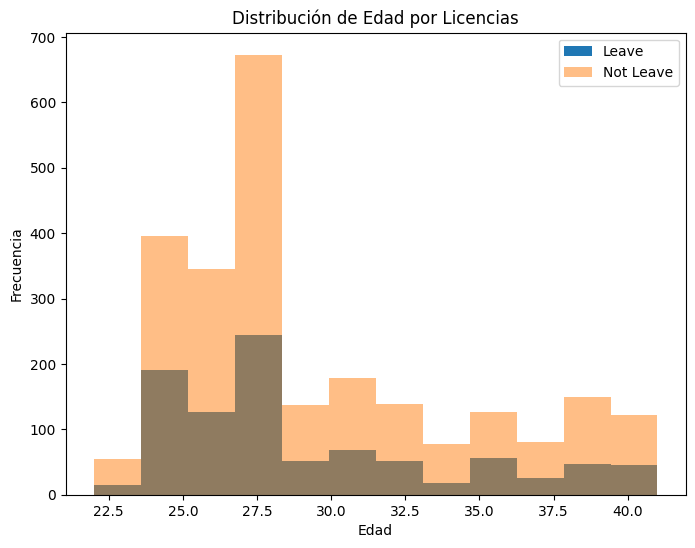

In [55]:


# Calcular el número de bins según la regla de Sturges
N = len(df['Age'])  # Número total de observaciones
num_bins = int(1 + np.log2(N))

# Histograma de edad para Leave vs Not Leave
plt.figure(figsize=(8, 6))
plt.hist(df[df['LeaveOrNot'] == 'Leave']['Age'], bins=num_bins, label='Leave')
plt.hist(df[df['LeaveOrNot'] == 'Not Leave']['Age'], bins=num_bins, alpha=0.5, label='Not Leave')
plt.title('Distribución de Edad por Licencias')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



## Graficar la distribución de clases y responder: ¿Está el dataset balanceado? (por balanceado nos referimos a si la proporción de clases es similar)

El dataset no está balanceado por que como podemos apreciar abajo tenemos unos porcentajes de 20% (en licencia) vs 70% (no en licencia).
En estos casos lo ideal es que cada clase se acerque al 50%

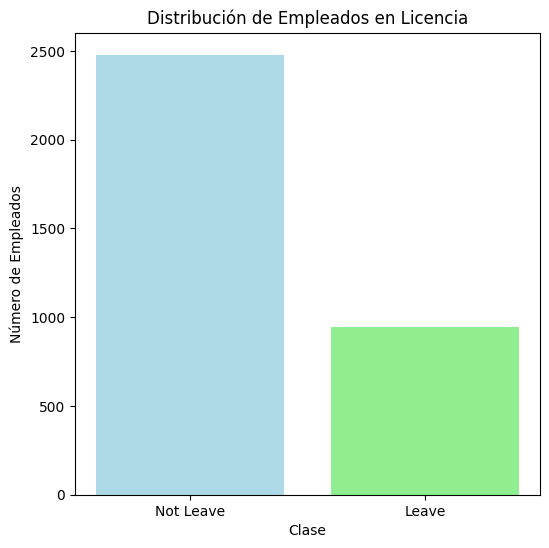

Porcentaje de Empleados en licencia: 27.56
Porcentaje de Empleados no en licencia: 72.44


In [57]:
# Contar los valores de LeaveOrNot
leave_counts = df['LeaveOrNot'].value_counts()

# Graficar la distribución de clases
plt.figure(figsize=(6, 6))
plt.bar(leave_counts.index, leave_counts.values, color=['lightblue', 'lightgreen'])
plt.title('Distribución de Empleados en Licencia')
plt.xlabel('Clase')
plt.ylabel('Número de Empleados')
plt.xticks([0, 1], ['Not Leave', 'Leave'])
plt.show()

# Calcular la proporción de clases
proportion_leave = leave_counts['Leave']*100 / len(df)
proportion_not_leave = leave_counts['Not Leave']*100 / len(df)
print(f'Porcentaje de Empleados en licencia: {proportion_leave:.2f}')
print(f'Porcentaje de Empleados no en licencia: {proportion_not_leave:.2f}')
